# **PART B: REGRESSION (40 marks)**

**Done by:**<br>Randy See Meng Teck<br>p2021669<br>DAAA/FT/2A/05

## 1. Import libraries

In [1]:
# Others
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import statistics as stat
import time
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, SGDRegressor, Ridge
from sklearn.metrics import r2_score, get_scorer, explained_variance_score
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

## 2. Import datasets

In [2]:
df = pd.read_csv('./kc_house_data.csv')
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


**id**: Unique identifier for house listing<br>
**date**: Date house listing was listed<br>
**price (target var)**: Price house was listed at<br>
**bedrooms**: Number of bedrooms<br>
**bathrooms**: Number of bathrooms<br>
**sqft_living**: Size of living area in sqft<br>
**sqft_lot**: Size of land size in sqft<br>
**floors**: Number of floors in the house<br>
**waterfront**: House has a view infront of a water body<br>
**view**: How good the view is<br>
**condition**: How good the condition of the house is<br>
**grade**: Grade given to the house based on Kings County grading system<br>
**sqft_above**: Size of house other than basement in sqft<br>
**sqft_basement**: Size of basement in sqft<br>
**yr_built**: Year built<br>
**yr_renovated**: Year when house was last renovated<br>
**zipcode**: Zip code of house<br>
**lat**: Latitute of house<br>
**long**: Longitude of house<br>
**sqft_living15**: Size of living area in 2015 in sqft<br>
**sqft_lot15**: Size of lot in 2015 in sqft

## 3. Data Cleaning

### 3.1. Checking for missing values

In [3]:
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: ", df.shape)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
Shape of Original DataFrame:  (21613, 21)


### 3.2. Identify single-valued columns

In [4]:
print(df.nunique().sort_values(ascending=True).reset_index(name='count'))

            index  count
0      waterfront      2
1            view      5
2       condition      5
3          floors      6
4           grade     12
5        bedrooms     13
6       bathrooms     30
7         zipcode     70
8    yr_renovated     70
9        yr_built    116
10  sqft_basement    306
11           date    372
12           long    752
13  sqft_living15    777
14     sqft_above    946
15    sqft_living   1038
16          price   4028
17            lat   5034
18     sqft_lot15   8689
19       sqft_lot   9782
20             id  21436


### 3.3. Check duplicates

In [5]:
# Calculate duplicates
dups = df.duplicated()
print(dups.any())

# List all duplicate rows
print(df[dups])

False
Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]


## 4. Exploratory Data Anaylsis

### 4.1. Descriptive statistics

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### 4.2. Price distribution

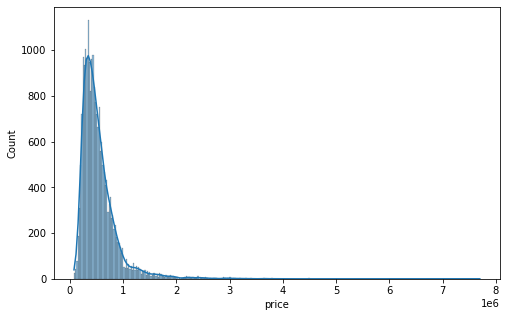

In [7]:
fig = plt.figure(figsize=(8,5))
sns.histplot(df['price'],kde=True)
plt.show()

*Price has a strong positive skew, will need to log transform it later

### 4.3. Price vs sqft

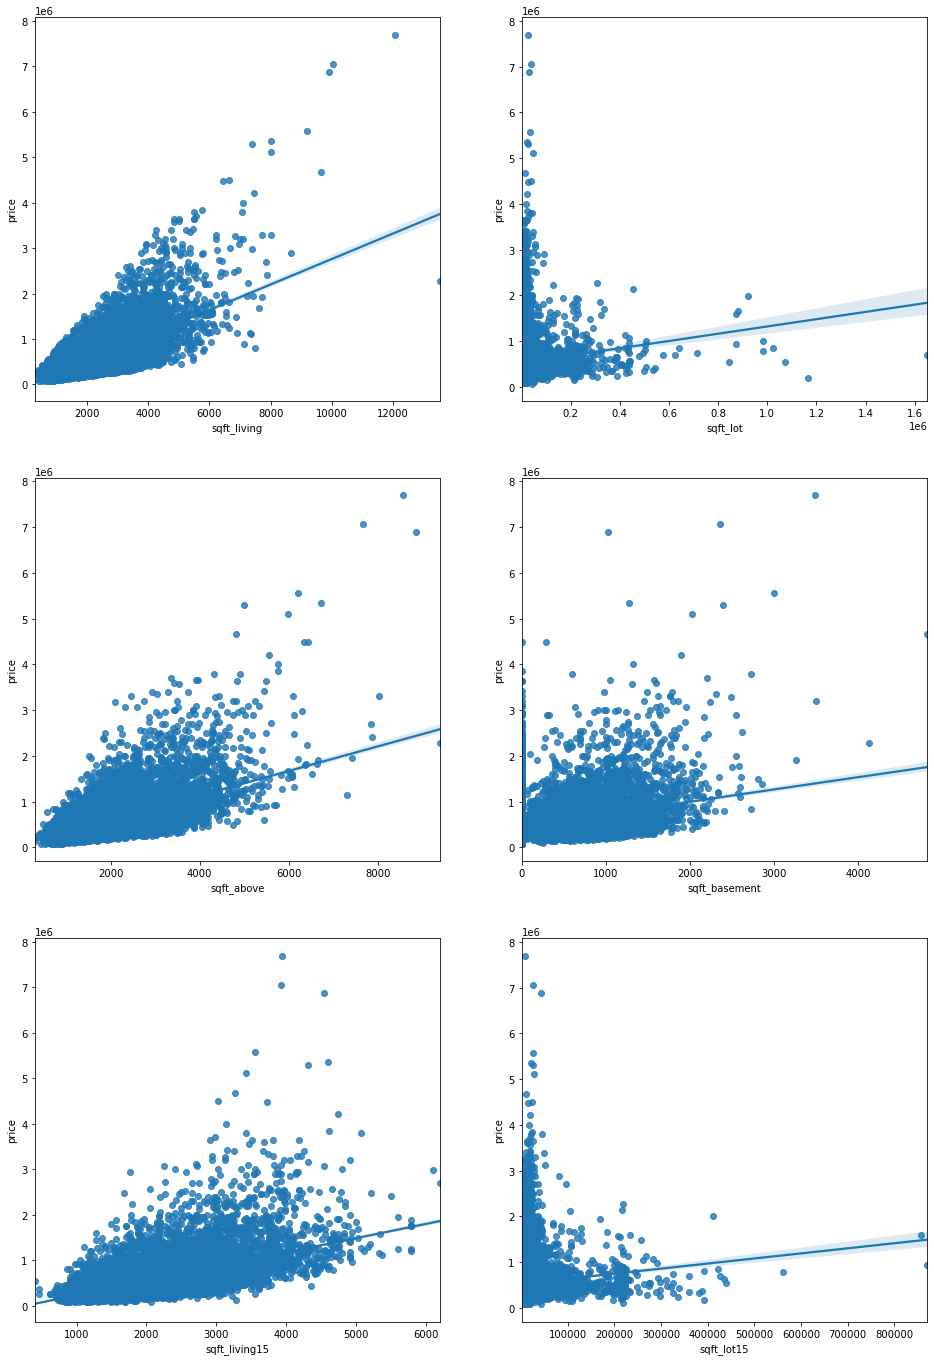

In [8]:
fig = plt.figure(figsize=(16,24))

plt.subplot(3,2,1)
sns.regplot(data=df, x='sqft_living', y='price')

plt.subplot(3,2,2)
sns.regplot(data=df, x='sqft_lot', y='price')

plt.subplot(3,2,3)
sns.regplot(data=df, x='sqft_above', y='price')

plt.subplot(3,2,4)
sns.regplot(data=df, x='sqft_basement', y='price')

plt.subplot(3,2,5)
sns.regplot(data=df, x='sqft_living15', y='price')

plt.subplot(3,2,6)
sns.regplot(data=df, x='sqft_lot15', y='price')

plt.show()

 *Price_living has the best correlation against price

### 4.4. Price vs year

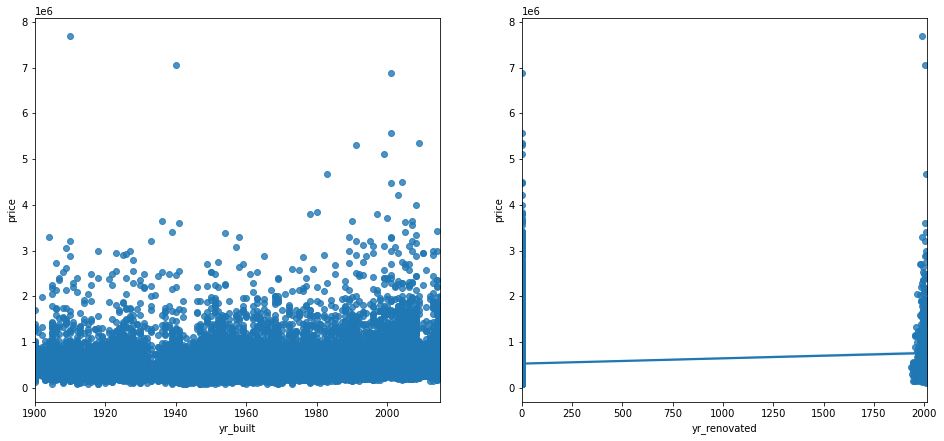

In [9]:
fig = plt.figure(figsize=(16,24))

plt.subplot(3,2,1)
sns.regplot(data=df, x='yr_built', y='price')

plt.subplot(3,2,2)
sns.regplot(data=df, x='yr_renovated', y='price')

plt.show()

*Split yr_renovated into categorical variable later

### 4.5. Visualise data distribution

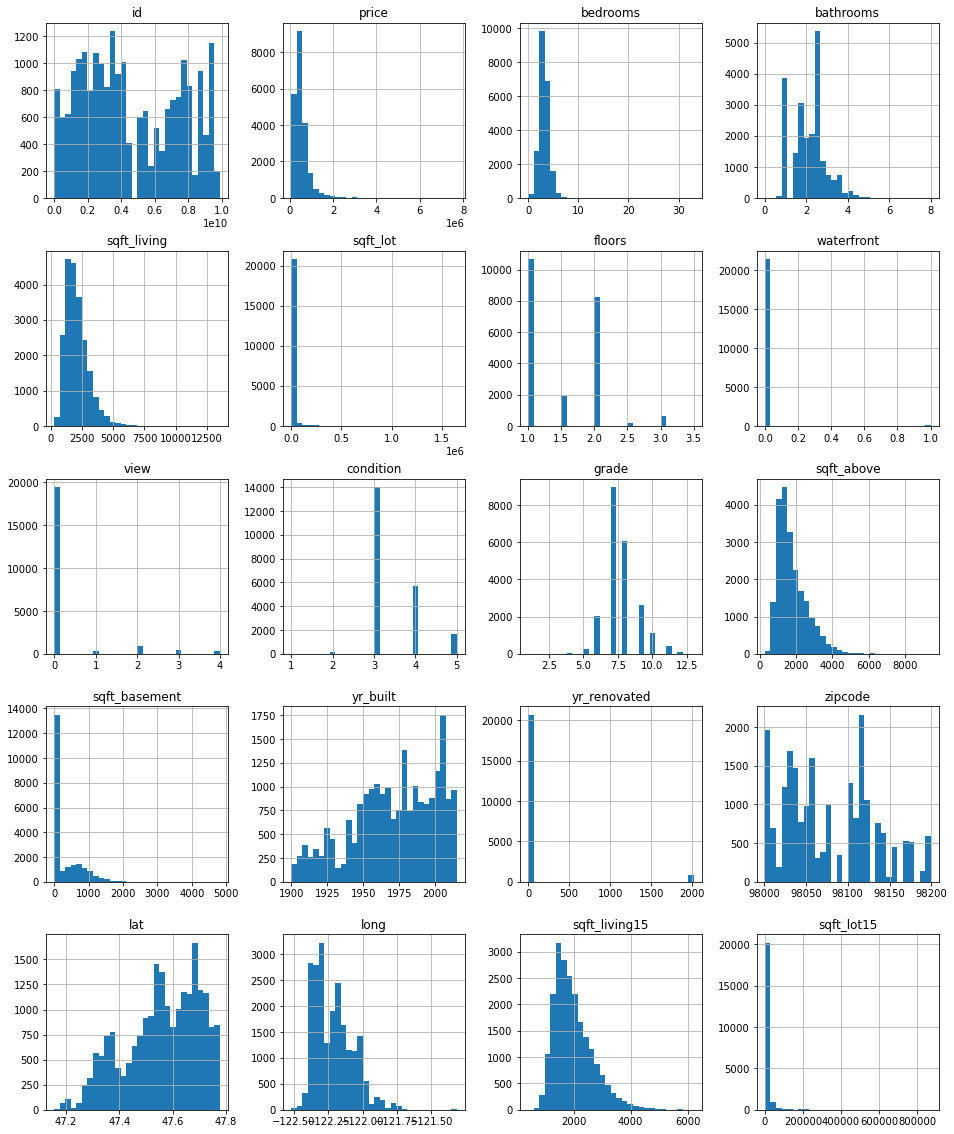

In [10]:
df.hist(figsize=(16,20), bins=30)
plt.show()

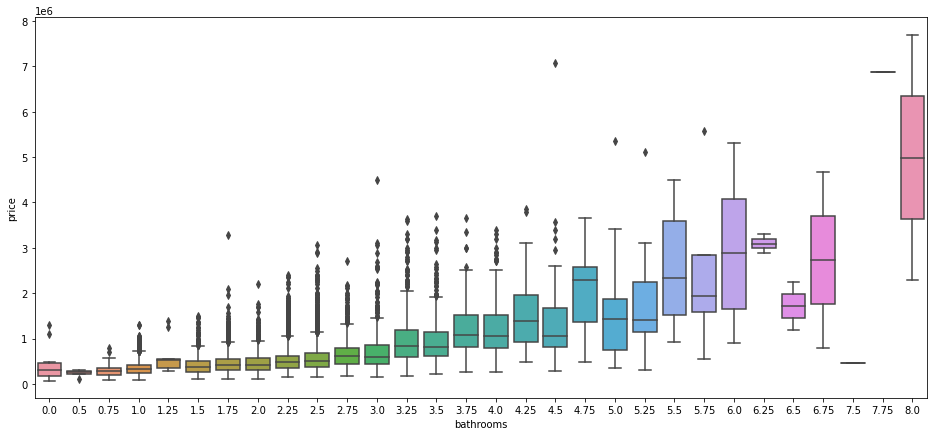

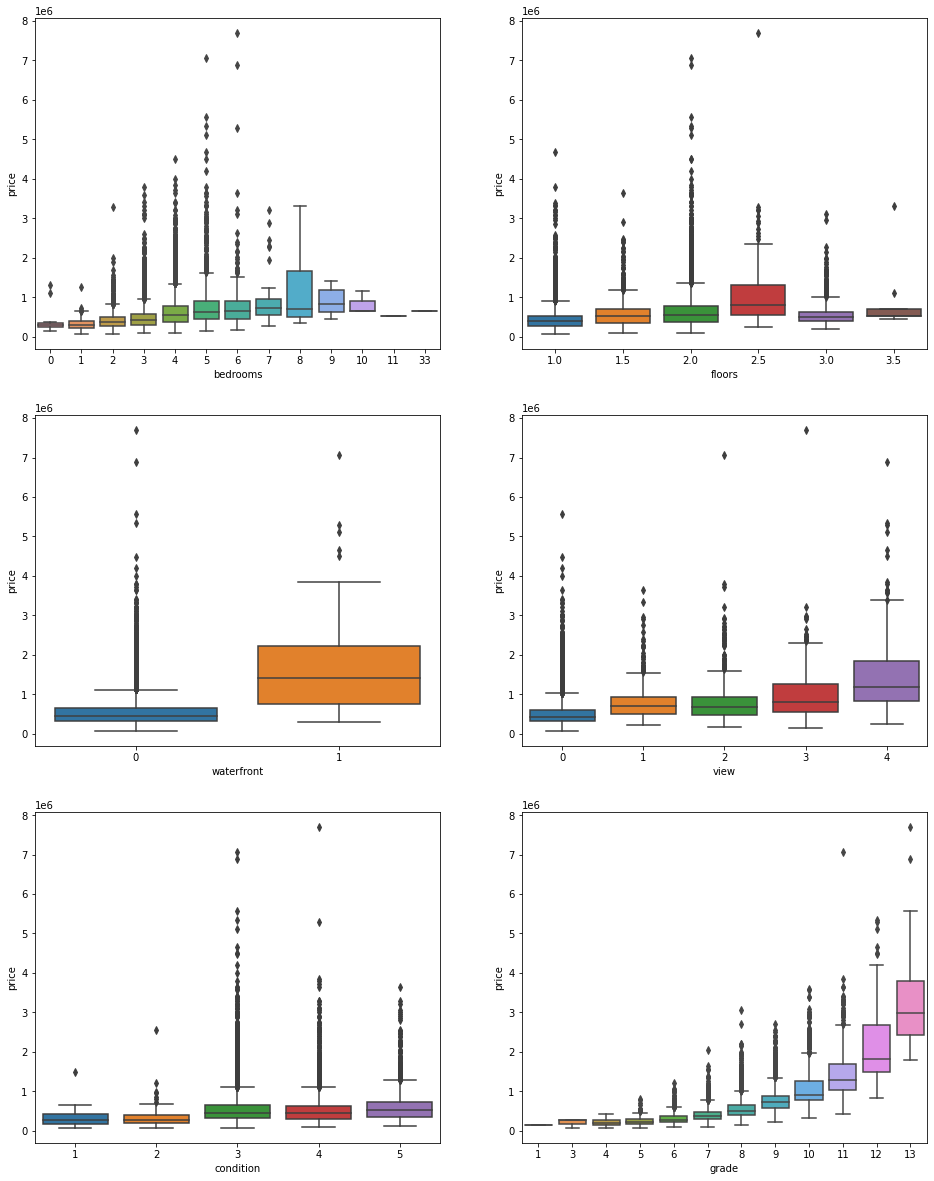

In [11]:
plt.figure(figsize=(16,7))

sns.boxplot(data=df, x='bathrooms', y='price')

plt.figure(figsize=(16,28))

plt.subplot(4,2,1)
sns.boxplot(data=df, x='bedrooms', y='price')

plt.subplot(4,2,2)
sns.boxplot(data=df, x='floors', y='price')

plt.subplot(4,2,3)
sns.boxplot(data=df, x='waterfront', y='price')

plt.subplot(4,2,4)
sns.boxplot(data=df, x='view', y='price')

plt.subplot(4,2,5)
sns.boxplot(data=df, x='condition', y='price')

plt.subplot(4,2,6)
sns.boxplot(data=df, x='grade', y='price')

# display plot
plt.show()

### 4.6. Investigate data inconsistencies

#### 4.6.1. Bathrooms

In [12]:
df[df['bathrooms']==7.5].append(df[df['price']==450000]).head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8546,424049043,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,0,...,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
48,9215400105,20150428T000000,450000.0,3,1.75,1250,5963,1.0,0,0,...,7,1250,0,1953,0,98115,47.6796,-122.301,970,5100
276,9189700045,20150127T000000,450000.0,3,2.00,2290,16258,1.0,0,0,...,8,2290,0,1960,0,98058,47.4672,-122.165,1660,10530
376,9423400140,20140609T000000,450000.0,3,1.75,1640,13500,1.0,0,0,...,7,1110,530,1940,0,98125,47.7164,-122.304,1770,12600
406,7821200390,20140806T000000,450000.0,3,2.00,1290,1213,3.0,0,0,...,8,1290,0,2001,0,98103,47.6609,-122.344,1290,3235


In [13]:
df.at[8546,'price'] = 4500000
df[df['bathrooms']==7.5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8546,424049043,20140811T000000,4500000.0,9,7.5,4050,6504,2.0,0,0,...,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866


In [14]:
df[df['bathrooms']==7.75]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.24,4540,42730


#### 4.6.2. Bedrooms

In [15]:
df.loc[df['bedrooms'].sort_values(ascending=False).index[:5]]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
13314,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
15161,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914


In [16]:
df.drop(df.index[[15870,8757]], inplace=True)
df.reset_index(drop=True, inplace=True)
df.loc[df['bedrooms'].sort_values(ascending=False).index[:5]]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13313,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
19252,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
15160,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
18441,8823901445,20150313T000000,934000.0,9,3.00,2820,4480,2.0,0,0,...,7,1880,940,1918,0,98105,47.6654,-122.307,2460,4400
16842,8823900290,20150317T000000,1400000.0,9,4.00,4620,5508,2.5,0,0,...,11,3870,750,1915,0,98105,47.6684,-122.309,2710,4320


#### 4.6.3. Grade

In [17]:
df[df['grade']==11].sort_values(by='price',ascending=False).head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
2085,8106100105,20141114T000000,3850000.0,4,4.25,5770,21300,2.0,1,4,...,11,5770,0,1980,0,98040,47.5850,-122.222,4620,22748
6508,4217402115,20150421T000000,3650000.0,6,4.75,5480,19401,1.5,1,4,...,11,3910,1570,1936,0,98105,47.6515,-122.277,3510,15810
15254,2425049063,20140911T000000,3640900.0,4,3.25,4830,22257,2.0,1,4,...,11,4830,0,1990,0,98039,47.6409,-122.241,3820,25582
5880,2525049148,20141007T000000,3418800.0,5,5.00,5450,20412,2.0,0,0,...,11,5450,0,2014,0,98039,47.6209,-122.237,3160,17825


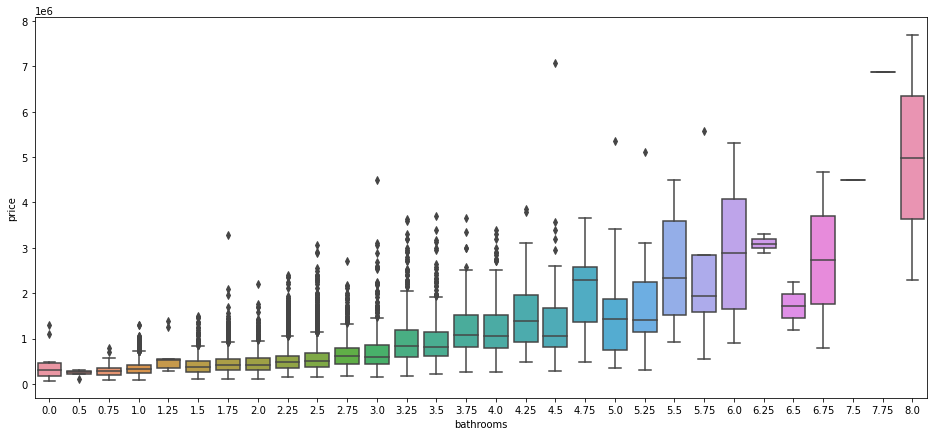

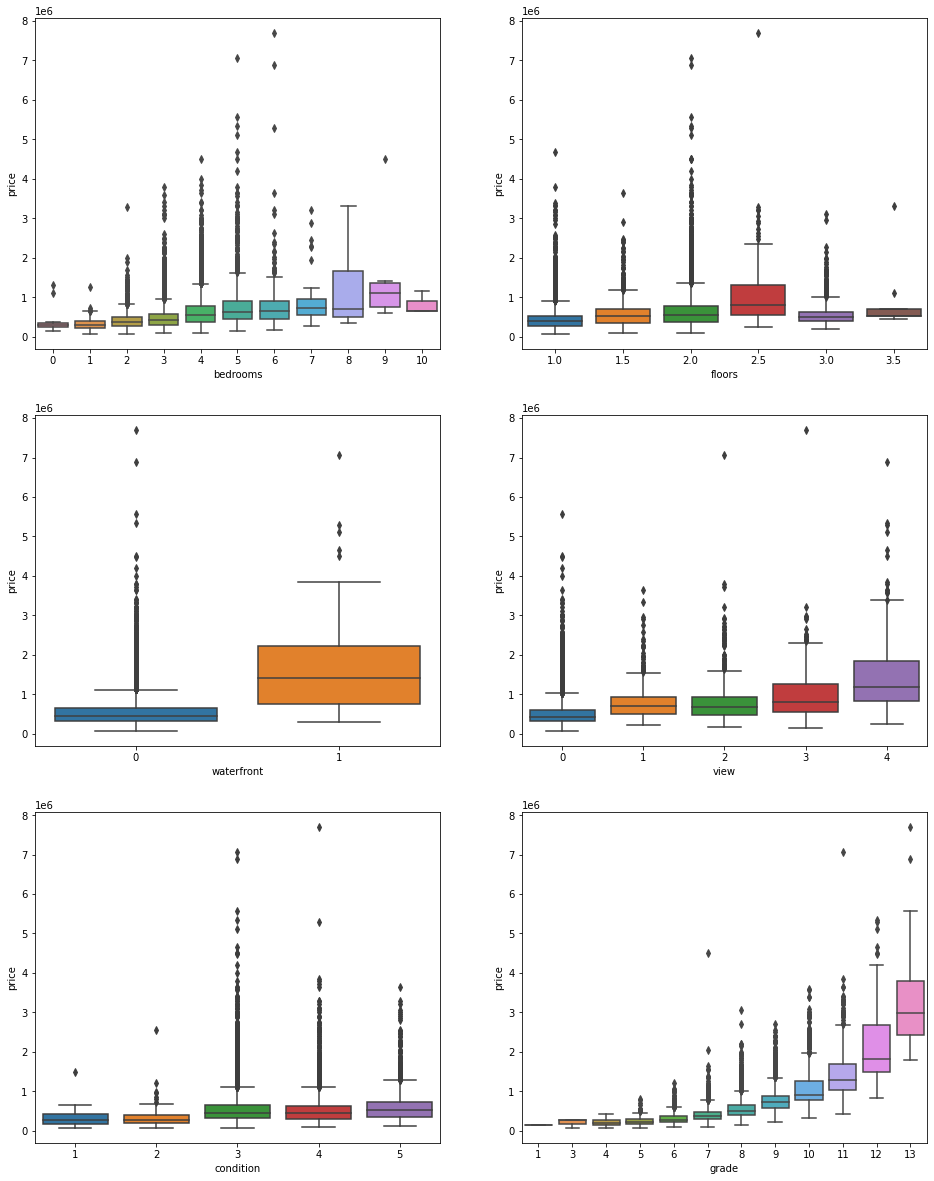

In [18]:
plt.figure(figsize=(16,7))

sns.boxplot(data=df, x='bathrooms', y='price')

plt.figure(figsize=(16,28))

plt.subplot(4,2,1)
sns.boxplot(data=df, x='bedrooms', y='price')

plt.subplot(4,2,2)
sns.boxplot(data=df, x='floors', y='price')

plt.subplot(4,2,3)
sns.boxplot(data=df, x='waterfront', y='price')

plt.subplot(4,2,4)
sns.boxplot(data=df, x='view', y='price')

plt.subplot(4,2,5)
sns.boxplot(data=df, x='condition', y='price')

plt.subplot(4,2,6)
sns.boxplot(data=df, x='grade', y='price')

# display plot
plt.show()

### 4.7. Check for multicollinearity

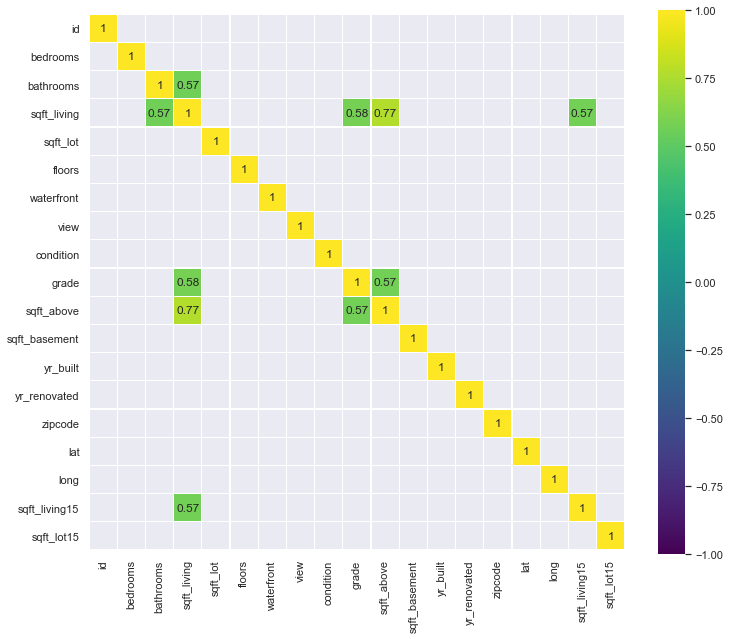

In [19]:
r2 = df.drop('price', axis=1).corr()**2
plt.figure(figsize=(12, 10))

sns.set_theme(style='darkgrid')
sns.heatmap(r2[r2 >= 0.75**2], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 12}, square=True);

*Drop high R^2

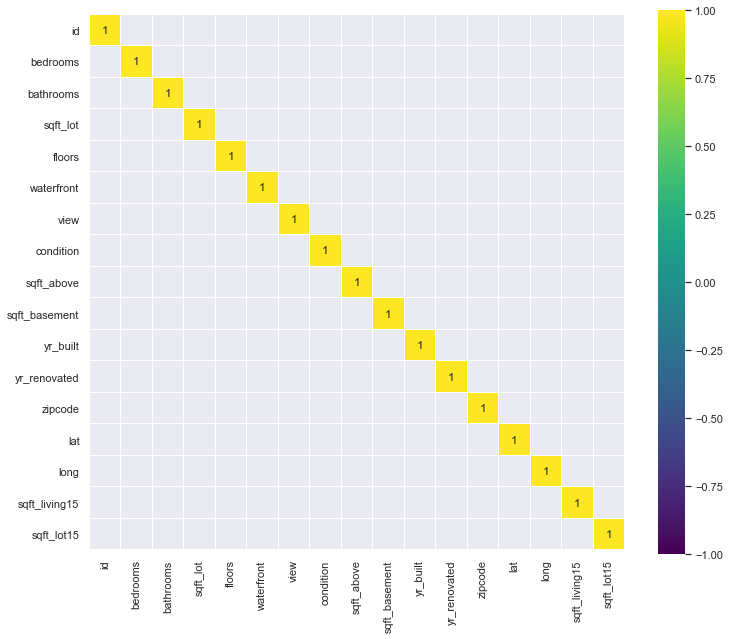

In [20]:
df.drop(['sqft_living'], axis=1, inplace=True)
df.drop(['grade'], axis=1, inplace=True)

r2 = df.drop('price', axis=1).corr()**2
plt.figure(figsize=(12, 10))

sns.set_theme(style='darkgrid')
sns.heatmap(r2[r2 >= 0.75**2], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 12}, square=True);

### 4.8. Price vs zipcode

<AxesSubplot:xlabel='long', ylabel='lat'>

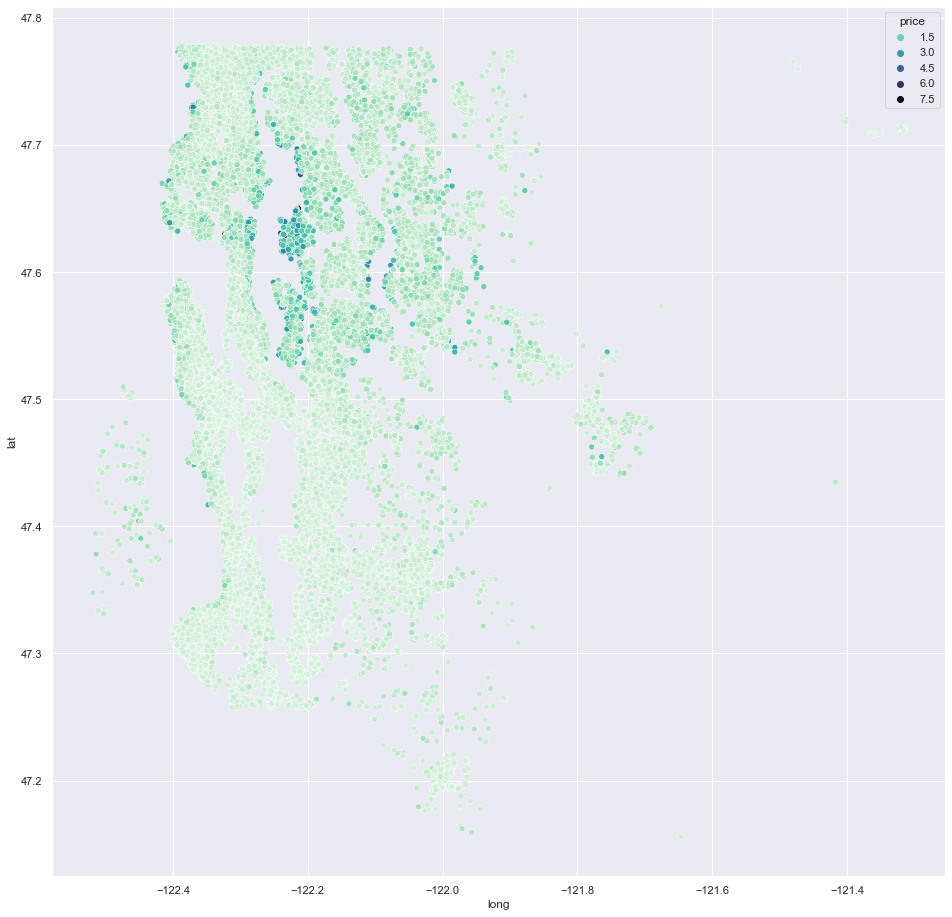

In [21]:
plt.figure(figsize = (16,16))
sns.scatterplot(x='long',y='lat',data=df,hue='price',palette='mako_r')

*Prices largely varies by county

## 5. Feature engineering

### 5.1 Separate data types

In [22]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df_cat = df[['waterfront','view','condition','yr_built','yr_renovated','zipcode','month']].copy()
df_num = df[['bedrooms','bathrooms','sqft_lot','floors',
             'sqft_above','sqft_basement','sqft_living15','sqft_lot15']].copy()
df_tar = df[['price']]
print(df_cat.columns)
print(df_num.columns)
df.head(3)

Index(['waterfront', 'view', 'condition', 'yr_built', 'yr_renovated',
       'zipcode', 'month'],
      dtype='object')
Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


,id,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,7129300520,2014-10-13,221900.0,3,1.00,5650,1.0,0,0,3,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10
1,6414100192,2014-12-09,538000.0,3,2.25,7242,2.0,0,0,3,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12
2,5631500400,2015-02-25,180000.0,2,1.00,10000,1.0,0,0,3,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2


### 5.2. Label categorical

In [23]:
df_cat['waterfront'] = df_cat['waterfront'].astype(int)
df_cat['waterfront'] = df_cat['waterfront'].astype(str)
df_cat['view'] = df_cat['view'].astype(int)
df_cat['view'] = df_cat['view'].astype(str)
df_cat['condition'] = df_cat['condition'].astype(int)
df_cat['condition'] = df_cat['condition'].astype(str)
df_cat['zipcode'] = df_cat['zipcode'].astype(str)
df_cat.head(3)

,waterfront,view,condition,yr_built,yr_renovated,zipcode,month
0,0,0,3,1955,0,98178,10
1,0,0,3,1951,1991,98125,12
2,0,0,3,1933,0,98028,2


### 5.3. Seasons

In [24]:
df_cat.month.replace(12,0,inplace=True)
df_cat['month'] = pd.cut(df_cat['month'], [0,3,6,9,11], include_lowest=True,
                         labels=["Winter", "Spring", "Summer", "Autumn"])
df_cat.head(3)

,waterfront,view,condition,yr_built,yr_renovated,zipcode,month
0,0,0,3,1955,0,98178,Autumn
1,0,0,3,1951,1991,98125,Winter
2,0,0,3,1933,0,98028,Winter


### 5.4. Year Built

In [25]:
df_cat['yr_built'].describe()
df_cat['yr_built'] = pd.cut(df_cat['yr_built'], [1900,1940,1955,1970,1980,1990,2015], include_lowest=True,
                            labels=["Gen1","Gen2","Gen3",
                                    "Gen4","Gen5","Gen6"])
df_cat.head(3)
# https://www.seattlehousing.org/about-us/history
# labels=["Old Seattle","SHA establishment","WW2","Poor, old, disabled","Dispersed","Poor"]

,waterfront,view,condition,yr_built,yr_renovated,zipcode,month
0,0,0,3,Gen2,0,98178,Autumn
1,0,0,3,Gen2,1991,98125,Winter
2,0,0,3,Gen1,0,98028,Winter


### 5.5. Renovated

In [26]:
df_cat['yr_renovated'] = pd.cut(df_cat['yr_renovated'], [0,1,2015], include_lowest=True,
                               labels=["Not renovated","Renovated"])
df_cat.head(3)

,waterfront,view,condition,yr_built,yr_renovated,zipcode,month
0,0,0,3,Gen2,Not renovated,98178,Autumn
1,0,0,3,Gen2,Renovated,98125,Winter
2,0,0,3,Gen1,Not renovated,98028,Winter


### 5.6. Visualise categorical

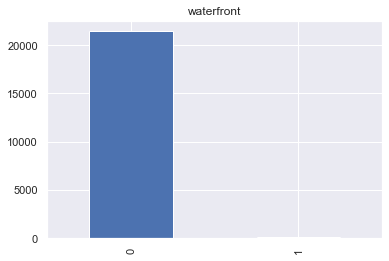

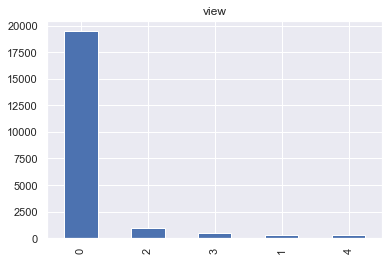

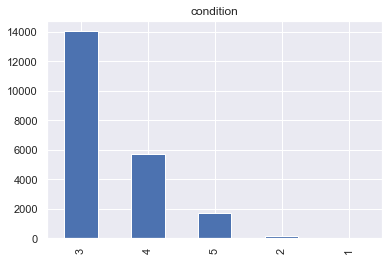

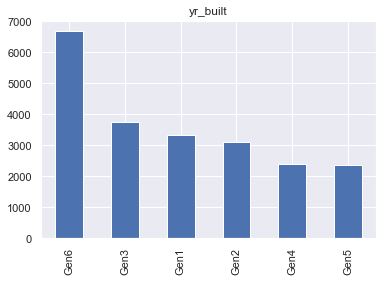

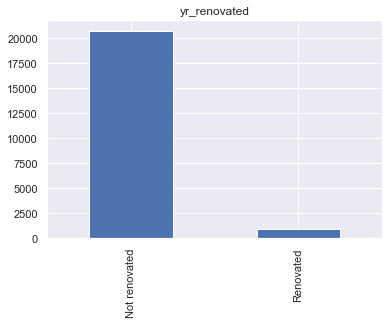

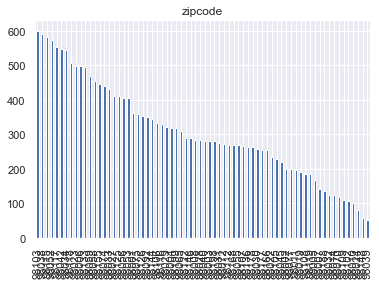

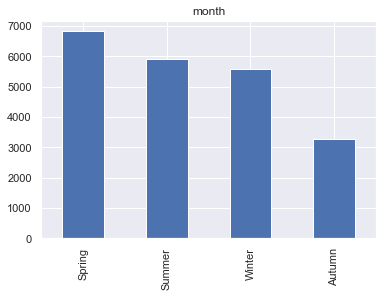

In [27]:
for col in df_cat.columns:
    df_cat[col].value_counts().plot(kind='bar',title=col)
    plt.show()

In [28]:
df_cat = pd.get_dummies(df_cat, drop_first=True)
df_cat.head(3)

,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,yr_built_Gen2,...,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,month_Spring,month_Summer,month_Autumn
0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5.7. Sqft total

In [29]:
df_num['sqft_total'] = df_num['sqft_living15'] + df_num['sqft_lot15']
df_num.head(3)

,bedrooms,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15,sqft_total
0,3,1.00,5650,1.0,1180,0,1340,5650,6990
1,3,2.25,7242,2.0,2170,400,1690,7639,9329
2,2,1.00,10000,1.0,770,0,2720,8062,10782


### 5.8. Scaling and normalising

In [30]:
scaler = StandardScaler()
df_num = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)
df_num.head(3)

,bedrooms,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15,sqft_total
0,-0.407191,-1.447417,-0.228333,-0.915420,-0.734704,-0.658602,-0.943429,-0.260731,-0.283025
1,-0.407191,0.175636,-0.189899,0.936501,0.460826,0.245198,-0.432765,-0.187887,-0.197780
2,-1.510339,-1.447417,-0.123315,-0.915420,-1.229823,-0.658602,1.070047,-0.172395,-0.144826


Raw skew is 4.047752016700443
Log skew is 0.4307187787265031
Sqrt skew is 1.6654607062819913
Cube Root skew is 1.183609446427234


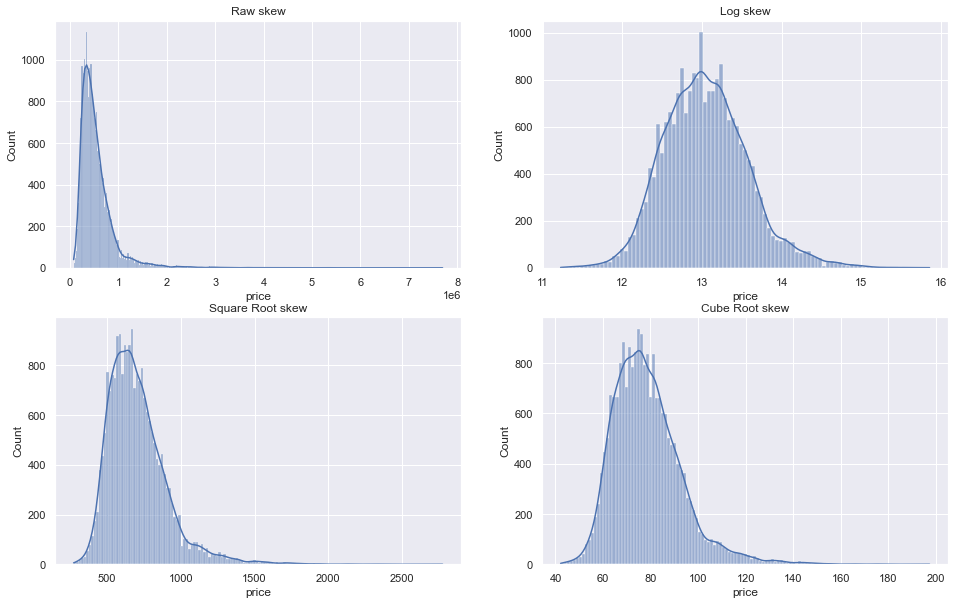

In [31]:
fig = plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.title('Raw skew')
target = df_tar['price']
print("Raw skew is", target.skew())
sns.histplot(df_tar['price'],kde=True)

plt.subplot(2,2,2)
plt.title('Log skew')
target = np.log(df_tar['price'])
print("Log skew is", target.skew())
sns.histplot(target,kde=True)

plt.subplot(2,2,3)
plt.title('Square Root skew')
target = np.sqrt(df_tar['price'])
print("Sqrt skew is", target.skew())
sns.histplot(target,kde=True)

plt.subplot(2,2,4)
plt.title('Cube Root skew')
target = np.cbrt(df_tar['price'])
print("Cube Root skew is", target.skew())
sns.histplot(target,kde=True)

plt.show()

## 6. Feature selection

In [32]:
#y = df_tar['price']
y = np.log(df_tar['price'])
#y = np.sqrt(df_tar['price'])
#y = np.cbrt(df_tar['price'])
X = pd.concat([df_num,df_cat], axis=1)
print("Shape of y:",y.shape)
print("Shape of X:",X.shape)
X.head(3)

Shape of y: (21611,)
Shape of X: (21611, 96)


,bedrooms,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15,sqft_total,waterfront_1,...,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,month_Spring,month_Summer,month_Autumn
0,-0.407191,-1.447417,-0.228333,-0.915420,-0.734704,-0.658602,-0.943429,-0.260731,-0.283025,0,...,0,0,0,1,0,0,0,0,0,1
1,-0.407191,0.175636,-0.189899,0.936501,0.460826,0.245198,-0.432765,-0.187887,-0.197780,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.510339,-1.447417,-0.123315,-0.915420,-1.229823,-0.658602,1.070047,-0.172395,-0.144826,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)

(17288, 96)


### 6.1. Wrapper

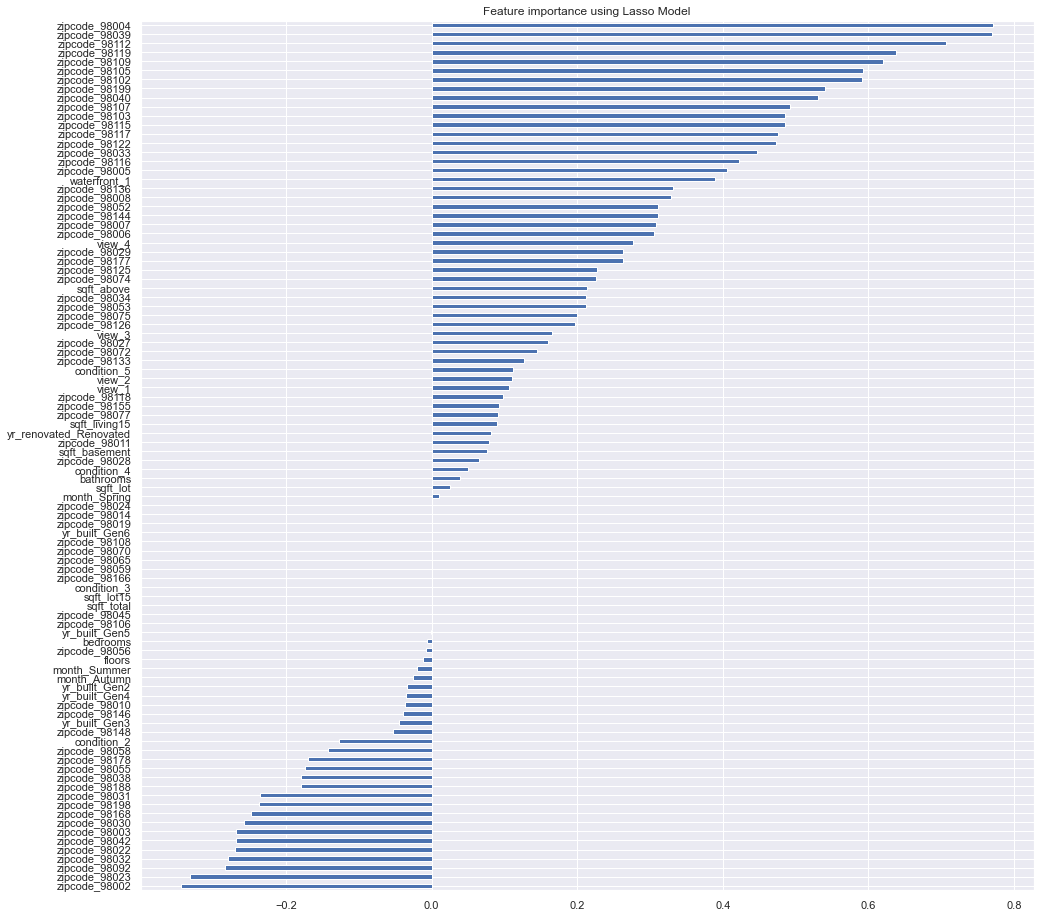

Optimal number of features: 82
Score with 82 features: 0.857949 (alpha:0.000326)


In [34]:
reg = LassoCV()
reg.fit(X, y)
coef = pd.Series(reg.coef_, index = X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(16,16))
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.savefig("./feature_importance.png")
plt.show()
print("Optimal number of features:",sum(coef != 0))
print("Score with %d features: %f (alpha:%f)" % (sum(coef != 0), reg.score(X,y), reg.alpha_))

### 6.2. RFE

In [35]:
nof_list=np.arange(1,len(X.columns))
high_score=0
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model = LinearRegression()
    rfe = RFE(model,n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimal number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

selected_columns = X.columns[rfe.support_]

Optimal number of features: 95
Score with 95 features: 0.867210


In [36]:
selector = RFE(model, n_features_to_select=nof)
selector = selector.fit(X, y)
select_features  = [i for i,j in zip(X.columns,selector.ranking_) if j==1]
X = X[select_features]
X.head(3)

,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15,sqft_total,waterfront_1,view_1,...,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,month_Spring,month_Summer,month_Autumn
0,-1.447417,-0.228333,-0.915420,-0.734704,-0.658602,-0.943429,-0.260731,-0.283025,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0.175636,-0.189899,0.936501,0.460826,0.245198,-0.432765,-0.187887,-0.197780,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.447417,-0.123315,-0.915420,-1.229823,-0.658602,1.070047,-0.172395,-0.144826,0,0,...,0,0,0,0,0,0,0,0,0,0


## 7. Model comparison

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)

(17288, 95)


In [38]:
X_train.head(3)

,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15,sqft_total,waterfront_1,view_1,...,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,month_Spring,month_Summer,month_Autumn
17613,0.500247,-0.181811,0.936501,0.243457,-0.658602,-0.126366,-0.205722,-0.207876,0,0,...,0,0,0,0,0,0,0,0,0,0
16969,-0.473585,-0.128312,-0.915420,-0.529411,-0.658602,-0.432765,-0.171736,-0.181708,0,0,...,0,0,0,0,0,0,0,0,1,0
6252,0.500247,-0.183887,0.936501,2.320541,-0.658602,1.536940,-0.193307,-0.153973,0,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
classifiers = [
    (ExtraTreesRegressor(), "Extra Trees"),
    (SVR(kernel='linear'),"SVM"),
    (Ridge(),"Ridge"),
    (SGDRegressor(),"SGD Regressor"),
    (LassoCV(),"Lasso"),
    (LinearRegression(),"Linear Regression"),
    (GradientBoostingRegressor(),"Gradient Boosting"),
    (RandomForestRegressor(),"Random Forest")]

comparedf = pd.DataFrame()

for clf, name in classifiers:
    now = time.time()
    
    model = clf
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_test_exp = np.exp(y_test)
    y_pred_exp = np.exp(y_pred)
    
    vals = {}
    vals["R^2"] = "{:.3f}".format(metrics.r2_score(y_test, y_pred))
    vals["Adjusted R^2 (Test)"] = "{:.3f}".format(1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
    vals["Mean Absolute Error"] = "{:.3f}".format(metrics.mean_absolute_error(y_test_exp, y_pred_exp))
    vals["Median Absolute Error"] = "{:.3f}".format(np.sum(np.median(np.abs(y_test_exp - y_pred_exp))))
    later = time.time()
    diff = '{:.3f}'.format(later-now)
    vals["Time"] = diff
    row = pd.DataFrame(vals,index=[name])
    comparedf = comparedf.append(row)

print("* All dataframe values are measured through test statistic")
comparedf

* All dataframe values are measured through test statistic


,R^2,Adjusted R^2 (Test),Mean Absolute Error,Median Absolute Error,Time
Extra Trees,0.837,0.836,86858.672,48065.025,17.404
SVM,0.863,0.863,84101.934,46850.557,48.106
Ridge,0.864,0.863,83814.783,46795.091,0.019
SGD Regressor,0.818,0.817,91947.715,51451.672,0.116
Lasso,0.854,0.853,86663.994,49146.136,0.405
Linear Regression,0.864,0.863,83609.234,46717.645,0.031
Gradient Boosting,0.760,0.758,111701.543,72365.979,3.251
Random Forest,0.794,0.793,98431.398,53798.737,15.506


## 8. Hyperparameter optimisation

### 8.1. Ridge

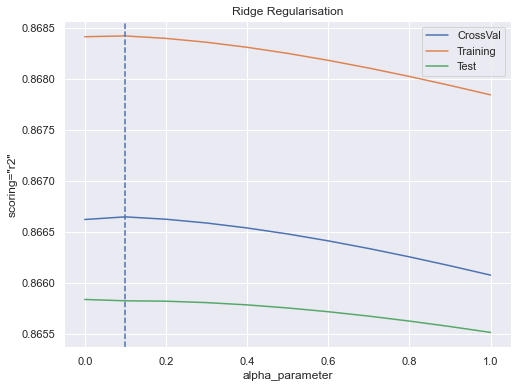

The best parameters are {'alpha': 0.1}
with a R^2(Train) of 0.86842
and a R^2(Test) of 0.86584
and a R^2(CrossVal) of 0.86665


In [40]:
alpha_range = np.linspace(0, 1, 11)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = {'train':[],'test':[],'validation':[],'results':[]}
scorer = get_scorer(scoring='r2')

for alpha in alpha_range:
    ridge = Ridge(alpha=alpha)
    results = cross_validate(ridge, X, y, scoring='r2', cv=cv, return_train_score=True)
    scores['train'].append(np.mean(results['train_score']))
    scores['validation'].append(np.mean(results['test_score']))
    scores['results'].append(results)
    ridge.fit(X,y)
    y_pred = ridge.predict(X_test)
    scores['test'].append(scorer(ridge,X_test,y_test))
    
index = np.argmax(scores['validation'])
best_alpha = alpha_range[index]
max_val_score = np.max(scores['validation'])
max_test_score = np.max(scores['test'])
max_train_score = np.max(scores['train'])

plt.figure(figsize=(8,6))
sns.lineplot(y=scores['validation'],x=alpha_range,label="CrossVal")
sns.lineplot(y=scores['train'],x=alpha_range,label="Training")
plt.axvline(x=best_alpha, linestyle='--')
sns.lineplot(y=scores['test'],x=alpha_range,label="Test")
plt.xlabel('alpha_parameter')
plt.ylabel('scoring="r2"')
plt.title("Ridge Regularisation")
plt.legend()
plt.show()

print("The best parameters are %s" % ({'alpha': best_alpha}))
print("with a R^2(Train) of %0.5f" % (max_train_score))
print("and a R^2(Test) of %0.5f" % (max_test_score))
print("and a R^2(CrossVal) of %0.5f" % (max_val_score))

### 8.2. Linear Regression

In [41]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = {'train':[],'test':[],'validation':[],'results':[]}
linreg = LinearRegression(n_jobs=-1)

results = cross_validate(linreg, X, y, cv=cv, return_train_score=True)
scores['train'].append(np.mean(results['train_score']))
scores['validation'].append(np.mean(results['test_score']))
scores['results'].append(results)
linreg.fit(X,y)
y_pred = linreg.predict(X_test)
scores['test'].append(scorer(linreg,X_test,y_test))

index = np.argmax(scores['validation'])
max_val_score = np.max(scores['validation'])
max_test_score = np.max(scores['test'])
max_train_score = np.max(scores['train'])

print("The best R^2s is")
print("a R^2(Train) of %0.5f" % (max_train_score))
print("and a R^2(Test) of %0.5f" % (max_test_score))
print("and a R^2(CrossVal) of %0.5f" % (max_val_score))

The best R^2s is
a R^2(Train) of 0.86843
and a R^2(Test) of 0.86582
and a R^2(CrossVal) of 0.86665


### 8.3. Lasso

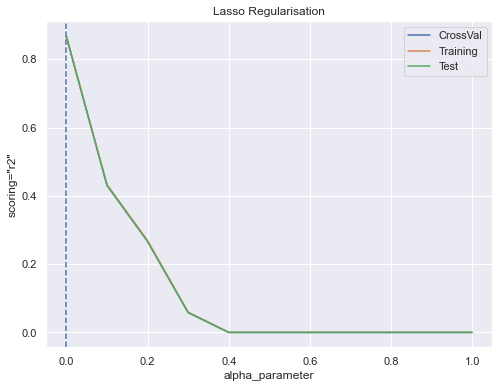

The best parameters are {'alpha': 0.0}
with a R^2(Train) of 0.86843
and a R^2(Test) of 0.86582
and a R^2(CrossVal) of 0.86665


In [42]:
alpha_range = np.linspace(0, 1, 11)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = {'train':[],'test':[],'validation':[],'results':[]}
scorer = get_scorer(scoring='r2')

for alpha in alpha_range:
    lasso = Lasso(alpha=alpha)
    results = cross_validate(lasso, X, y, scoring='r2', cv=cv, return_train_score=True)
    scores['train'].append(np.mean(results['train_score']))
    scores['validation'].append(np.mean(results['test_score']))
    scores['results'].append(results)
    lasso.fit(X,y)
    y_pred = lasso.predict(X_test)
    scores['test'].append(scorer(lasso,X_test,y_test))
    
index = np.argmax(scores['validation'])
best_alpha = alpha_range[index]
max_val_score = np.max(scores['validation'])
max_test_score = np.max(scores['test'])
max_train_score = np.max(scores['train'])

plt.figure(figsize=(8,6))
sns.lineplot(y=scores['validation'],x=alpha_range,label="CrossVal")
sns.lineplot(y=scores['train'],x=alpha_range,label="Training")
plt.axvline(x=best_alpha, linestyle='--')
sns.lineplot(y=scores['test'],x=alpha_range,label="Test")
plt.xlabel('alpha_parameter')
plt.ylabel('scoring="r2"')
plt.title("Lasso Regularisation")
plt.legend()
plt.show()

print("The best parameters are %s" % ({'alpha': best_alpha}))
print("with a R^2(Train) of %0.5f" % (max_train_score))
print("and a R^2(Test) of %0.5f" % (max_test_score))
print("and a R^2(CrossVal) of %0.5f" % (max_val_score))

## 9. Model selection

### 9.1. Linear Regression

In [43]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = {'train':[],'test':[],'validation':[],'results':[]}
linreg = LinearRegression(n_jobs=-1)

now = time.time()
results = cross_validate(linreg, X, y, cv=cv, return_train_score=True)
scores['validation'].append(np.mean(results['test_score']))
later = time.time()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
y_test_exp = np.exp(y_test)
y_pred_exp = np.exp(y_pred)
print('#'*26)
print('# Cross Validated Scores #')
print('#'*26)
print('Adjusted R^2: {:.5f}'.format(1-(1-scores['validation'][0])*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))
print('Mean Absolute Error: {:.3f}'.format(metrics.mean_absolute_error(y_test_exp, y_pred_exp)))
print('Median Absolute Error: {:.3f}'.format(np.sum(np.median(np.abs(y_test_exp - y_pred_exp)))))
print('Time taken: {:.3f}'.format(later-now))

##########################
# Cross Validated Scores #
##########################
Adjusted R^2: 0.86592
Mean Absolute Error: 83609.234
Median Absolute Error: 46717.645
Time taken: 0.259


## 10. Evaluate model performance

### 10.1. R^2 & Adjusted R^2

In [44]:
linreg = LinearRegression(n_jobs=-1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
y_test_exp = np.exp(y_test)
y_pred_exp = np.exp(y_pred)

vals = {}
vals["R^2"] = "{:.3f}".format(metrics.r2_score(y_test, y_pred))
vals["Adjusted R^2"] = "{:.3f}".format(1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
vals["Explained var score"] = "{:.3f}".format(explained_variance_score(y_test,y_pred))
row = pd.DataFrame(vals,index=["Linear Regression"])
comparedf = pd.DataFrame(row)
comparedf

,R^2,Adjusted R^2,Explained var score
Linear Regression,0.864,0.863,0.864


### 10.2. MSE & RMSE

In [45]:
vals = {}
vals["Mean Squared Error"] = "{:.3f}".format(metrics.mean_squared_error(y_test_exp, y_pred_exp))
vals["Root Mean Squared Error"] = "{:.3f}".format(np.sqrt(metrics.mean_squared_error(y_test_exp, y_pred_exp)))
row = pd.DataFrame(vals,index=["Linear Regression"])
comparedf = pd.DataFrame(row)
comparedf

,Mean Squared Error,Root Mean Squared Error
Linear Regression,83724180431.177,289351.310


### 10.3. MAE, MAE & MAPE

In [46]:
vals = {}
vals["Adjusted R^2"] = "{:.3f}".format(1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
vals["Mean Absolute Error"] = "{:.3f}".format(metrics.mean_absolute_error(y_test_exp, y_pred_exp))
vals["Mean Absolute Percentage Error"] = "{:.2f}%".format(np.mean(np.abs((y_test_exp - y_pred_exp) / y_test_exp)) * 100)
vals["Median Absolute Error"] = "{:.3f}".format(np.sum(np.median(np.abs(y_test_exp - y_pred_exp))))
row = pd.DataFrame(vals,index=["Linear Regression"])
comparedf = pd.DataFrame(row)
comparedf

,Adjusted R^2,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error
Linear Regression,0.863,83609.234,14.65%,46717.645


### 10.4. Model vs stupid baseline

In [47]:
# Works the same as DummyRegressor but at minimal computational expense
stupid_pred = np.full(4323,np.exp(np.mean(y)))

vals["Adjusted R^2"] = "{:.3f}".format(1 - (1-metrics.r2_score(y_test_exp, stupid_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
vals["Mean Absolute Error"] = "{:.3f}".format(metrics.mean_absolute_error(y_test_exp, stupid_pred))
vals["Mean Absolute Percentage Error"] = "{:.2f}%".format(np.mean(np.abs((y_test_exp - stupid_pred) / y_test_exp)) * 100)
vals["Median Absolute Error"] = "{:.3f}".format(np.sum(np.median(np.abs(y_test_exp - stupid_pred))))
row = pd.DataFrame(vals,index=["Stupid baseline(Mean)"])
comparedf = comparedf.append(row)

stupid_pred_2 = np.full(4323,np.exp(np.median(y)))

vals["Adjusted R^2"] = "{:.3f}".format(1 - (1-metrics.r2_score(y_test_exp, stupid_pred_2))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
vals["Mean Absolute Error"] = "{:.3f}".format(metrics.mean_absolute_error(y_test_exp, stupid_pred_2))
vals["Mean Absolute Percentage Error"] = "{:.2f}%".format(np.mean(np.abs((y_test_exp - stupid_pred_2) / y_test_exp)) * 100)
vals["Median Absolute Error"] = "{:.3f}".format(np.sum(np.median(np.abs(y_test_exp - stupid_pred_2))))
row = pd.DataFrame(vals,index=["Stupid baseline(Median)"])
comparedf = comparedf.append(row)

comparedf

,Adjusted R^2,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error
Linear Regression,0.863,83609.234,14.65%,46717.645
Stupid baseline(Mean),-0.053,228171.341,44.28%,155122.278
Stupid baseline(Median),-0.070,227787.239,42.85%,150000.000


## 11. Conclusion

<img src='./feature_importance.png' width="1200" height="1200">

## 12. Report

**• How is your prediction task defined? And what is the meaning of the 
output variable?**<br>
My prediction task is to predict the housing prices in Washington, mainly in Seattle.<br>
The output variable is a continuous value of house listing prices.

**• How do you represent your data as features?**<br>
I represent my data by separating them into 2 categories, numerical and categorical(nominal) data<br>

**• Did you process the features in any way?**<br>
I feature engineered new columns such as:<br>
Sqft_total: from sqft_lot15 and sqft_living15<br>
Renovated?: from renovation date<br>
Seasons: from month<br>
Gen: from US age revolutions<br>
...and more<br>
I also removed highly correlated columns

**• Did you bring in any additional sources of data?**<br>
No.

**• How did you select which learning algorithms to use?**<br>
Through my Exploratory Data Analysis I found out that the price is very closely linearly<br>
related to many of the features, thus I focused on linear models. I selected the<br>
linear learning algorithm by identifying that it has the highest adjusted R^2,<br>
lowest Mean Absolute Error and Median Absolute Error among the other models.

**• Did you try to tune the hyper parameters of the learning algorithm, and 
in that case how?**<br>
I tried to tune the hyper parameters for Ridge Regressor and Lasso Reg. The best value<br>
for alpha in Ridge is 0.1 and in Lasso 0. This suggests that the features are mostly linearly<br>
correlated to the output variable ('price')

**• How do you evaluate the quality of your system?**<br>
I evaluated the quality of my system through the R^2, mean absolute error and median absolute error

**• How well does your system compare to a stupid baseline?**<br>
My system makes 14.65% mean absolute percentage error whereas<br>
the best stupid baseline(mean) makes 44.28% mean absolute percentage error

**• Can you say anything about the errors that the system makes?**<br>
The system makes a mean error of USD83609 and a median error of USD46717

**• Is it possible to say something about which features the model considers 
important?**<br>
Yes, alpha = 0 was the best parameter for Lasso. When alpha = 0, Lasso Reg.<br>
produces the same coefficients as a linear regression. The important features<br>
can be visualised in 11. Conclusion. The features that the model consider important<br>
is mostly the categorical zipcodes. This is because Seattle neighborhoods are<br>
grouped with different socio-economy statuses and they try to be diverse<br>
Many houses can be subsidised by the government as well due to their high tax.